In [1]:
#Load the libraries
import pandas as pd #import and manage datasets
import matplotlib.pyplot as plt #make graphs
import numpy as np #Contains mathematic tools
from sklearn.preprocessing import Imputer #rectify missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
import seaborn as seabornInstance 

In [6]:
df = pd.read_csv("otp2.csv")
df.describe()

,Route,Departing Port,Arriving Port,Airline,Month,Sectors Scheduled,Sectors Flown,Cancellations,Departures On Time,Arrivals On Time,Departures Delayed,Arrivals Delayed,OnTime Departures (%),OnTime Arrivals (%),Cancellations (%)
count,56291,56291,56291,56291,56291,56291,56291,56291,56291,56291,56291,56291,56291,56291,56291
unique,143,42,42,10,115,2462,2469,436,2301,2285,1220,1301,631,658,227
top,All Ports-All Ports,Sydney,Sydney,All Airlines,Dec-17,31,31,0,27,26,3,3,100.0,100.0,0.0
freq,938,9350,9350,14149,560,3054,2701,28114,995,1010,2608,2592,1481,1449,28538


In [10]:
print(df.head())
print(df.tail())
print(df.isna().sum())
print(df.isnull().sum())

                 Route Departing Port Arriving Port  Airline   Month  \
0    Adelaide-Brisbane       Adelaide      Brisbane  Jetstar  Jan-18   
1  Adelaide-Gold Coast       Adelaide    Gold Coast  Jetstar  Jan-18   
2   Adelaide-Melbourne       Adelaide     Melbourne  Jetstar  Jan-18   
3       Adelaide-Perth       Adelaide         Perth  Jetstar  Jan-18   
4      Adelaide-Sydney       Adelaide        Sydney  Jetstar  Jan-18   

  Sectors Scheduled Sectors Flown Cancellations Departures On Time  \
0                30            30             0                 25   
1                40            40             0                 34   
2               123           119             4                 86   
3                30            30             0                 19   
4               142           135             7                107   

  Arrivals On Time Departures Delayed Arrivals Delayed  \
0               24                  5                6   
1               35            

In [12]:
df[['Month1','Year']] = df.Month.str.split("-",expand=True,)
print(df.head())

                 Route Departing Port Arriving Port  Airline   Month  \
0    Adelaide-Brisbane       Adelaide      Brisbane  Jetstar  Jan-18   
1  Adelaide-Gold Coast       Adelaide    Gold Coast  Jetstar  Jan-18   
2   Adelaide-Melbourne       Adelaide     Melbourne  Jetstar  Jan-18   
3       Adelaide-Perth       Adelaide         Perth  Jetstar  Jan-18   
4      Adelaide-Sydney       Adelaide        Sydney  Jetstar  Jan-18   

  Sectors Scheduled Sectors Flown Cancellations Departures On Time  \
0                30            30             0                 25   
1                40            40             0                 34   
2               123           119             4                 86   
3                30            30             0                 19   
4               142           135             7                107   

  Arrivals On Time Departures Delayed Arrivals Delayed  \
0               24                  5                6   
1               35            

In [16]:
#Check Types and values
df.dtypes
df['Route'].astype(str)
pd.value_counts(df['Route'].values, sort=True) #Count of all values
df['Route'].unique()
df['Route'].nunique()

143

In [17]:
pd.value_counts(df['Month1'].values, sort=True) #Count of all values
df['Month1'].unique()
df['Month1'].nunique()

12

In [21]:
df['Departures Delayed']=df['Departures Delayed'].str.strip()
df['Departures Delayed']=df['Departures Delayed'].str.replace(" ","")
df['Departures Delayed'] = pd.to_numeric(df['Departures Delayed'], errors = 'coerce')
print(df.isna().sum())
print(df.isnull().sum())
df['Departures Delayed'].dtype
df['Departures Delayed'].unique

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [18]:
#Encoding the categorical variables (IV)
#FIRST COLUMN ROUTE IS REPLACED BY 143 FEATURES (NUMBER OF ROUTES)
#sECOND COLUMN MONTH IS REPLACED BY 12 FEATURES (NUMBER OF MONTHS)
df = pd.get_dummies(df, columns=['Route','Month1'], drop_first=True)
shape = df.shape

In [19]:
columnNames = df.columns.values
print(columnNames)

['Departing Port' 'Arriving Port' 'Airline' 'Month' 'Sectors Scheduled'
 'Sectors Flown' 'Cancellations' 'Departures On Time' 'Arrivals On Time'
 'Departures Delayed' 'Arrivals Delayed' 'OnTime Departures \n(%)'
 'OnTime Arrivals \n(%)' 'Cancellations \n\n(%)' 'Year'
 'Route_Adelaide-Brisbane' 'Route_Adelaide-Canberra'
 'Route_Adelaide-Gold Coast' 'Route_Adelaide-Melbourne'
 'Route_Adelaide-Perth' 'Route_Adelaide-Port Lincoln'
 'Route_Adelaide-Sydney' 'Route_Albury-Sydney'
 'Route_Alice Springs-Adelaide' 'Route_Alice Springs-Darwin'
 'Route_Alice Springs-Melbourne' 'Route_Alice Springs-Sydney'
 'Route_All Ports-All Ports' 'Route_Armidale-Sydney'
 'Route_Ayers Rock-Sydney' 'Route_Ballina-Sydney'
 'Route_Brisbane-Adelaide' 'Route_Brisbane-Bundaberg'
 'Route_Brisbane-Cairns' 'Route_Brisbane-Canberra' 'Route_Brisbane-Darwin'
 'Route_Brisbane-Emerald' 'Route_Brisbane-Gladstone'
 'Route_Brisbane-Hamilton Island' 'Route_Brisbane-Hobart'
 'Route_Brisbane-Mackay' 'Route_Brisbane-Melbourne'
 'Ro

In [31]:
print(df.corr())

                                Departures Delayed  Route_Adelaide-Brisbane  \
Departures Delayed                        1.000000                -0.011513   
Route_Adelaide-Brisbane                  -0.011513                 1.000000   
Route_Adelaide-Canberra                  -0.011034                -0.008378   
Route_Adelaide-Gold Coast                -0.010818                -0.008033   
Route_Adelaide-Melbourne                 -0.004297                -0.010643   
Route_Adelaide-Perth                     -0.010911                -0.009618   
Route_Adelaide-Port Lincoln              -0.008397                -0.007768   
Route_Adelaide-Sydney                    -0.007012                -0.010495   
Route_Albury-Sydney                      -0.007230                -0.009160   
Route_Alice Springs-Adelaide             -0.007635                -0.005703   
Route_Alice Springs-Darwin               -0.007435                -0.005493   
Route_Alice Springs-Melbourne            -0.004362  

In [22]:
#Make the matrix of the features (the independent variables. Month and Route)
X = df.iloc[:,15:168].values
print(X) #Matrix of independent variables



[[1 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
#Dependent variable vector (departures delayed)#DV doesnt need to be encoded because it is numeric already

Y = df.iloc[:,9].values
print(Y)

[    5     6    33 ...    25    37 10654]


In [24]:
#Split the dataset into a training set and a test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 0) #Training and test sets of dv and iv. 


C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\Anna\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

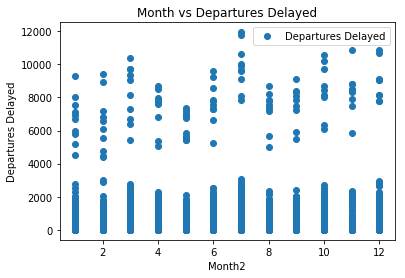

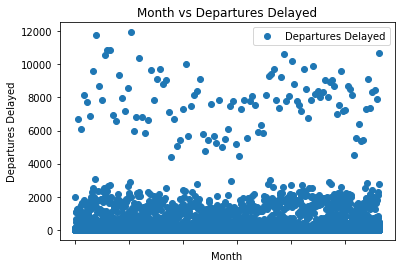

In [26]:
#May need to go a different way with this:
months = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}
df[['Month2','Year']] = df.Month.str.split("-",expand=True,)

df.Month2[df.Month2 == 'Jan'] = 1
df.Month2[df.Month2 == 'Feb'] = 2
df.Month2[df.Month2 == 'Mar'] = 3
df.Month2[df.Month2 == 'Apr'] = 4
df.Month2[df.Month2 == 'May'] = 5
df.Month2[df.Month2 == 'Jun'] = 6
df.Month2[df.Month2 == 'Jul'] = 7
df.Month2[df.Month2 == 'Aug'] = 8
df.Month2[df.Month2 == 'Sep'] = 9
df.Month2[df.Month2 == 'Oct'] = 10
df.Month2[df.Month2 == 'Nov'] = 11
df.Month2[df.Month2 == 'Dec'] = 12

df.plot(x='Month2', y='Departures Delayed', style='o')  
plt.title('Month vs Departures Delayed')  
plt.xlabel('Month2')  
plt.ylabel('Departures Delayed')  
plt.show()

df.plot(x='Month', y='Departures Delayed', style='o')  
plt.title('Month vs Departures Delayed')  
plt.xlabel('Month')  
plt.ylabel('Departures Delayed')  
plt.show()

In [27]:
#Multiple Linear Regression OF DATA
regressor = LinearRegression() #Create an object of the class linear regression
regressor.fit(X_train, Y_train) #fit object to training set

#Predicting the test set results
Y_pred = regressor.predict(X_test)

#Building the optimal model using backward elimination
print(X.shape)

X= np.append(arr = np.ones((56291, 1)).astype(int), values = X, axis = 1) #Intercept
X_opt = X[:, :] #This matrix contains all IVs
regressor_OLS = sm.OLS(endog = Y, exog = X_opt).fit()
regressor_OLS.summary()

#Repeat creating X_opt by removing IVs that have a p value of more than 0.05    need to do
#can automate this step
#After this, you will get the finalX_opt

(56291, 153)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     230.1
Date:                Mon, 16 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:41:03   Log-Likelihood:            -4.0179e+05
No. Observations:               56291   AIC:                         8.039e+05
Df Residuals:                   56137   BIC:                         8.053e+05
Df Model:                         153                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8108     23.165      0.035      0.972     -44.593      46.214
x1             8.5100     26.157      0.325      0.745     -42.757      59.777
x2             1.4222     27.566      0.052      0.959     -52.607      55.451
x3             0.2961     27.943      0.011      0.992     -54.472      55.064
x4            37.1590     25.867      1.437      0.151     -13.540      87.858
x5             8.5974     26.500      0.324      0.746     -43.344      60.538
x6            10.5082     28.264      0.372      0.710     -44.889      65.906
x7            26.8232     25.948      1.034      0.301     -24.034      77.681
x8            22.0880     26.849      0.823      0.411     -30.536      74.712
x9             0.4951     32.190      0.015      0.988     -62.598      63.588
x10           -0.4096     32.809     -0.012      0.990     -64.716      63.897
x11            4.3477     43.214      0.101      0.920     -80.352      89.047
x12            5.4989     55.704      0.099      0.921    -103.681     114.679
x13         1894.0332     24.874     76.146      0.000    1845.280    1942.786
x14           25.4537     32.059      0.794      0.427     -37.382      88.289
x15            4.9779     28.496      0.175      0.861     -50.874      60.830
x16           12.8352     26.865      0.478      0.633     -39.821      65.491
x17            9.4693     26.157      0.362      0.717     -41.798      60.736
x18            8.7762     30.728      0.286      0.775     -51.452      69.004
x19           18.0116     25.867      0.696      0.486     -32.687      68.710
x20           12.4948     26.723      0.468      0.640     -39.883      64.872
x21            2.4891     26.693      0.093      0.926     -49.829      54.807
x22           10.8594     29.527      0.368      0.713     -47.014      68.732
x23           19.2696     28.820      0.669      0.504     -37.218      75.757
x24            1.3737     28.064      0.049      0.961     -53.631      56.379
x25           -0.3846     31.023     -0.012      0.990     -61.190      60.421
x26           22.3352     26.865      0.831      0.406     -30.321      74.991
x27           62.1383     26.075      2.383      0.017      11.031     113.246
x28            7.6912     33.577      0.229      0.819     -58.121      73.503
x29            0.1703     29.642      0.006      0.995     -57.928      58.268
x30           15.8232     26.849      0.589      0.556     -36.801      68.447
x31           22.4477     27.477      0.817      0.414     -31.408      76.303
x32            2.3379     27.765      0.084      0.933     -52.082      56.758
x33           30.3654     27.351      1.110      0.267     -23.242      83.973
x34           86.9521     26.123      3.329      0.001      35.750     138.154
x35           19.1018     26.576      0.719      0.472     -32.988      71.192
x3